In [17]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

In [18]:
KEYS = [
    'entity_id',
    'financial_report_id',
    'financial_statement_id',
    'entity_ico',
    'entity_name']

DIMENSIONS = [
    'year',
    # 'month',
    # 'financial_report_order_number',
    'period_length',
    # 'consolidated',
    # 'approved_date',
    'type',
    'financial_report_template_id',
    # 'establishment_date',
    # 'cancellation_date',
    # 'sknace_code',
    # 'entity_state',
    'legal_form_code',
    'org_size_code',
    'ownership_category_code',
    'entity_consolidated',
    # 'sknace_division_name',
    'sknace_division',
    # 'sknace_subcategory',
    'sal_class',
    'is_mahalanobis_outlier',
    'is_z_score_outlier',
    'is_isolation_forest_outlier']

PRIMARY_VALUES = [
    'CA',
    'CASH',
    'CL',
    'EQ',
    'NCL',
    'TA',
    'TL',
    'CC',
    'INV',
    'CF_NETTO',
    'CF_SELFFIN',
    'EAT',
    'EBIT',
    'SAL',
    'COST',
    'INT',
    'YIE',
    'LABOR']

RATIOS = [
    'L3',
    'L2',
    'L1',
    'CF_CL',
    'CASH_TA',
    'SAL_TA',
    'TL_SAL',
    'INV_COST',
    'INV_SAL',
    'CC_SAL',
    'TA_SAL',
    'TL_TA',
    'CF_TL',
    'CL_TA',
    'NCL_TA',
    'EQ_TL',
    'EQ_TA',
    'CL_CC',
    'ROE',
    'EAT_TA',
    'ROA_BRUTTO',
    'CF_TA',
    'CF_SAL',
    'ROS',
    'EAT_YIE',
    'ROI',
    'ROA_NETTO',
    'LABOR_PRODUCTIVITY']

DISTRESS_SIGNALS = [
    'DPHZ_vat_registration_cancelled',
    'DPHZ_vat_registration_cancelled_1y_off',
    'DPHZ_vat_registration_cancelled_2y_off',
    'DPHZ_vat_registration_cancelled_3y_off',
    'RU_event',
    'RU_event_1y_off',
    'RU_event_2y_off',
    'RU_event_3y_off',
    'cancellation_year',
    'RUZ_cancelled',
    'RUZ_cancelled_1y_off',
    'RUZ_cancelled_2y_off',
    'RUZ_cancelled_3y_off']

In [19]:
training_raw = pd.read_csv('../../DATA/FINAL/training_sample.csv')
testing_raw = pd.read_csv('../../DATA/FINAL/testing_sample.csv')
training_raw

,entity_id,year,month,financial_report_id,financial_report_template_id,CA,CASH,CL,EQ,NCL,TA,TL,CC,INV,CF_NETTO,CF_SELFFIN,EAT,EBIT,SAL,COST,INT,YIE,LABOR,L3,L2,L1,CF_CL,CASH_TA,SAL_TA,TL_SAL,INV_COST,INV_SAL,CC_SAL,TA_SAL,TL_TA,CF_TL,CL_TA,NCL_TA,EQ_TL,EQ_TA,EBIT_INT,CL_CC,ROE,EAT_TA,ROA_BRUTTO,CF_TA,CF_SAL,ROS,EAT_YIE,ROI,ROA_NETTO,LABOR_PRODUCTIVITY,financial_statement_id,financial_report_order_number,entity_ico,period_length,consolidated,approved_date,type,entity_name,establishment_date,cancellation_date,sknace_code,entity_state,legal_form_code,org_size_code,ownership_category_code,entity_consolidated,sknace_division_name,sknace_division,sknace_subcategory,DPHZ_vat_registration_cancelled,DPHZ_vat_registration_cancelled_1y_off,DPHZ_vat_registration_cancelled_2y_off,DPHZ_vat_registration_cancelled_3y_off,RU_event,RU_event_1y_off,RU_event_2y_off,RU_event_3y_off,cancellation_year,RUZ_cancelled,RUZ_cancelled_1y_off,RUZ_cancelled_2y_off,RUZ_cancelled_3y_off,sal_class,establishment_year,is_mahalanobis_outlier,is_z_score_outlier,is_isolation_forest_outlier,RUZ_indirect_criteria,RUZ_indirect_criteria_1y_off,RUZ_indirect_criteria_2y_off,RUZ_indirect_criteria_3y_off,combined_issue_criteria_1y_off,combined_issue_criteria_2y_off,combined_issue_criteria_3y_off,plausible_sample
0,27971.0,2018.0,1.0,6791492,699.0,824851.0,137120.0,564418.0,17376.0,46374.0,875393.0,846466.0,673298.0,11072.0,13087.0,9028.0,2651.0,6710.0,3031963.0,3007396.0,8218.0,3031970.0,370870.0,1.461419,1.435847,0.242941,0.023187,0.156638,3.463545,0.279181,1.325373,1.314633,0.222067,103.939751,0.966955,0.015461,0.644760,0.052975,0.020528,0.019849,1.816500,0.838289,0.152567,0.003028,0.007665,0.014950,0.004316,0.000874,0.000874,0.012416,0.003028,0.122320,4101516.0,1.0,652423.0,12.0,NaN,2019-06-28,Riadna,KUHO - mix. spol. s r.o.,1991-06-25,NaN,49410.0,NaN,112.0,2.0,2.0,False,Pozemná doprava a doprava potrubím,H,49.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,0,0,0,0,2. Malý,1991,False,False,False,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,71752.0,2015.0,1.0,5058691,699.0,912862.0,2213.0,48840.0,2399.0,18406.0,948368.0,945969.0,910649.0,0.0,-35846.0,-38726.0,-57122.0,-54242.0,2134583.0,2202672.0,67110.0,2179262.0,12114.0,18.690868,18.690868,0.045311,-0.733948,0.002333,2.250796,0.443163,0.000000,0.000000,0.426617,159.943408,0.997470,-0.037893,0.051499,0.019408,0.002536,0.002530,0.191745,0.053632,-23.810754,-0.060232,-0.057195,-0.037798,-0.016793,-0.026760,-0.026212,0.010532,-0.060232,0.005675,2703097.0,1.0,36584649.0,12.0,NaN,2016-03-10,Riadna,FeCom s.r.o.,2004-10-08,NaN,46720.0,NaN,112.0,0.0,8.0,False,"Veľkoobchod, okrem motorových vozidiel a motoc...",G,46.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,0,0,0,0,2. Malý,2004,False,False,False,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,72912.0,2017.0,1.0,6351388,699.0,1481047.0,1630.0,1326396.0,-718007.0,549510.0,1521883.0,2239890.0,1417869.0,61548.0,47298.0,44418.0,10312.0,13192.0,4512342.0,4460274.0,32121.0,4512573.0,692228.0,1.116595,1.070192,0.001229,0.035659,0.001071,2.964973,0.496392,4.967695,4.910372,0.314220,121.417632,1.471789,0.021116,0.871549,0.361072,-0.320555,-0.471789,1.410697,0.935486,-0.014362,0.006776,0.008668,0.031079,0.010482,0.002285,0.002285,0.027882,0.006776,0.153408,3748560.0,1.0,35904798.0,12.0,NaN,2018-06-21,Riadna,"WETRON, s.r.o.",2004-10-23,NaN,33200.0,NaN,112.0,0.0,8.0,False,Oprava a inštalácia strojov a prístrojov,C,33.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,0,0,0,0,2. Malý,2004,False,False,False,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,81349.0,2017.0,1.0,6370373,699.0,514945.0,13348.0,82348.0,597059.0,278564.0,1595777.0,998718.0,501597.0,0.0,339656.0,326252.0,46443.0,59847.0,2017657.0,1883181.0,34235.0,2017735.0,250683.0,6.253279,6.253279,0.162093,4.124642,0.008365,1.264373,0.494989,0.000000,0.000000,0.248604,284.726155,0.625851,0.340092,0.051604,0.174563,0.597825,0.374149,2.748123,0.164172,0.077786,0.029104,0.037503,0.212847,0.168342,0.023018,0.023017,0.050557,0.029104,0.124245,3765328.0,1.0,36266388.0,12.0,NaN,NaN,Riadna,LINE - Molnár s.

In [20]:
SAL_CLASSES = training_raw['sal_class'].unique()
SKNACE_GROUPS = training_raw['sknace_division'].unique()

In [28]:
training_cleaned = training_raw.query('is_mahalanobis_outlier == False and is_z_score_outlier == False and is_isolation_forest_outlier == False and financial_report_template_id == 699 and sknace_division != "other"')
testing_cleaned = testing_raw.query('is_mahalanobis_outlier == False and is_z_score_outlier == False and is_isolation_forest_outlier == False and financial_report_template_id == 699 and sknace_division != "other"')

In [30]:
mean_values = dict()

for sal_class in SAL_CLASSES:
    for sknace in SKNACE_GROUPS:
        subset_training = training_cleaned.query('sal_class == @sal_class and sknace_division == @sknace')
        segment_mean_values = dict()
        for col in RATIOS:
            mean_value = subset_training[col].mean()
            # if np.isnan(mean_value): print(sal_class, sknace, col)
            segment_mean_values[col] = mean_value
        
        mean_values[(sal_class, sknace)] = segment_mean_values
    


In [31]:
training_filled = pd.DataFrame()
testing_filled = pd.DataFrame()


for sal_class in SAL_CLASSES:
    for sknace in SKNACE_GROUPS:
        subset_training = training_cleaned.query('sal_class == @sal_class and sknace_division == @sknace')
        subset_testing = testing_cleaned.query('sal_class == @sal_class and sknace_division == @sknace')
        segment_mean_values = mean_values[(sal_class, sknace)]
        for col in RATIOS:
            mean_value = segment_mean_values[col]
            subset_training[col] = subset_training[col].fillna(mean_value)
            subset_testing[col] = subset_testing[col].fillna(mean_value)

        training_filled = pd.concat([training_filled, subset_training], axis = 0)
        testing_filled = pd.concat([testing_filled, subset_testing], axis = 0)

C:\Users\matus.rohal\AppData\Local\Temp\ipykernel_11852\4138243076.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_training[col] = subset_training[col].fillna(mean_value)
C:\Users\matus.rohal\AppData\Local\Temp\ipykernel_11852\4138243076.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_testing[col] = subset_testing[col].fillna(mean_value)


In [61]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline




Q = training_filled.query('combined_issue_criteria_3y_off == 1')['entity_id'].nunique()

control_group_ratio = 1

training_balanced = (
    pd.concat(
        [
            training_filled.query('combined_issue_criteria_3y_off == 0').sample(int(Q * control_group_ratio)),
            training_filled.query('combined_issue_criteria_3y_off == 1').sample(Q),
        ], axis = 0
    )
)



Q_test = testing_filled.query('combined_issue_criteria_3y_off == 1')['entity_id'].nunique()

testing_balanced = (
    pd.concat(
        [
            testing_filled.query('combined_issue_criteria_3y_off == 0').sample(int(Q_test * control_group_ratio)),
            testing_filled.query('combined_issue_criteria_3y_off == 1').sample(Q_test),
        ], axis = 0
    )
)


X_train_balanced = training_balanced[RATIOS].values
y_train_balanced = training_balanced['combined_issue_criteria_3y_off'].values

X_test_balanced = testing_balanced[RATIOS].values
y_test_balanced = testing_balanced['combined_issue_criteria_3y_off'].values

X_train_imbalanced = training_filled[RATIOS].values
y_train_imbalanced = training_filled['combined_issue_criteria_3y_off'].values

X_test_imbalanced = testing_filled[RATIOS].values
y_test_imbalanced = testing_filled['combined_issue_criteria_3y_off'].values

smote = SMOTE(sampling_strategy='auto', random_state=42)
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)


In [62]:
print(X_train_balanced.shape, X_test_balanced.shape)
print(X_train_imbalanced.shape, X_test_imbalanced.shape)

(1672, 28) (368, 28)
(6466, 28) (1597, 28)


In [63]:
print(pd.Series(y_test_balanced).value_counts())
print(pd.Series(y_test_imbalanced).value_counts())

print(pd.Series(y_train_balanced).value_counts())
print(pd.Series(y_train_imbalanced).value_counts())

0.0    184
1.0    184
dtype: int64
0.0    1413
1.0     184
dtype: int64
0.0    836
1.0    836
dtype: int64
0.0    5630
1.0     836
dtype: int64


In [64]:
def eval(real, pred, label):
    print(f"{label} Accuracy:", accuracy_score(real, pred))
    print(f"{label} Precision:", precision_score(real, pred))
    print(f"{label} Recall:", recall_score(real, pred))
    print(f"{label} Balanced Accuracy:", balanced_accuracy_score(real, pred))
    print(f"{label} F1 Score:", f1_score(real, pred))

    cm = confusion_matrix(real, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(label)
    plt.show()

In [65]:

from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer, f1_score

## Random Forest Classifier

Selected Features: [False False False  True False False False False False  True False  True
 False  True False  True  True False  True False False False  True False
 False False False False]
Feature Ranking: [ 2 17  3  1 13 14 16 21 20  1  5  1  4  1  8  1  1 10  1 18  9 11  1 19
 12 15  7  6]
Balanced train Accuracy: 0.9994019138755981
Balanced train Precision: 1.0
Balanced train Recall: 0.9988038277511961
Balanced train Balanced Accuracy: 0.9994019138755981
Balanced train F1 Score: 0.9994015559545182


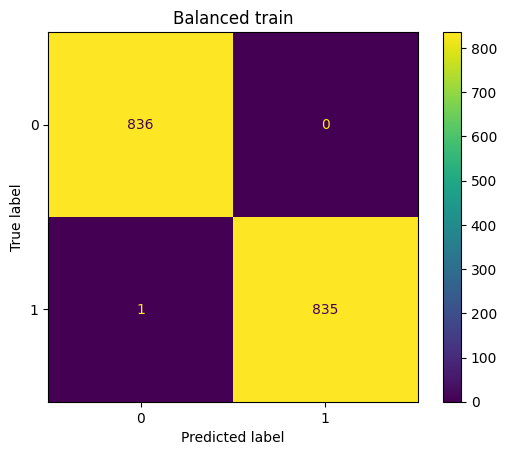

Balanced test Accuracy: 0.7065217391304348
Balanced test Precision: 0.7209302325581395
Balanced test Recall: 0.6739130434782609
Balanced test Balanced Accuracy: 0.7065217391304348
Balanced test F1 Score: 0.6966292134831461


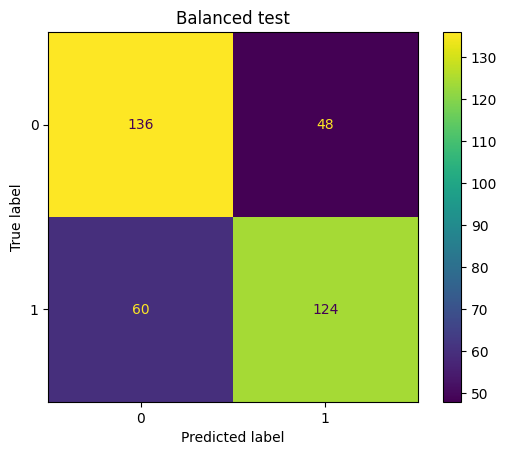

Imbalanced test Accuracy: 0.7263619286161553
Imbalanced test Precision: 0.24750499001996007
Imbalanced test Recall: 0.6739130434782609
Imbalanced test Balanced Accuracy: 0.7035524169974461
Imbalanced test F1 Score: 0.362043795620438


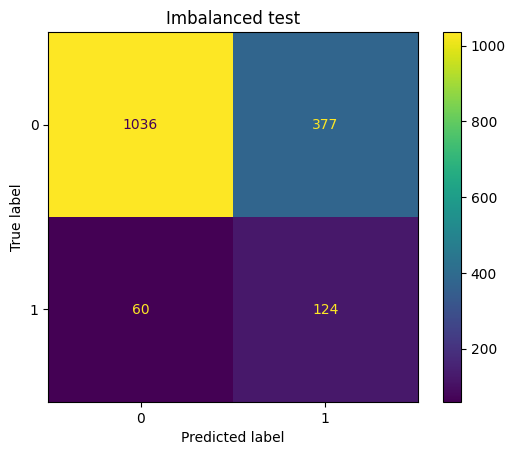

In [66]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=80, random_state=42)

# Create RFECV object with Random Forest as the estimator
rf_rfe = RFECV(estimator=rf, step=1, cv=5, scoring=make_scorer(f1_score))

# Fit RFECV
rf_rfe.fit(X_train_imbalanced, y_train_imbalanced)

# Transform the data
X_train_selected = rf_rfe.transform(X_train_balanced)
X_test_selected = rf_rfe.transform(X_test_imbalanced)
X_test_selected_balanced = rf_rfe.transform(X_test_balanced)

# Train a new classifier using only selected features
rf_final = RandomForestClassifier(n_estimators=100, random_state=42)
rf_final.fit(X_train_selected, y_train_balanced)

# Predict and calculate accuracy
y_pred = rf_final.predict(X_test_selected)
y_pred_balanced = rf_final.predict(X_test_selected_balanced)
y_pred_train = rf_final.predict(X_train_selected)

print("Selected Features:", rf_rfe.support_)
print("Feature Ranking:", rf_rfe.ranking_)


eval(y_train_balanced, y_pred_train, 'Balanced train')
eval(y_test_balanced, y_pred_balanced, 'Balanced test')
eval(y_test_imbalanced, y_pred, 'Imbalanced test')

## Decision Tree Classifier

##

Selected Features: [ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True]
Feature Ranking: [1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 2 1]
Balanced train Accuracy: 1.0
Balanced train Precision: 1.0
Balanced train Recall: 1.0
Balanced train Balanced Accuracy: 1.0
Balanced train F1 Score: 1.0


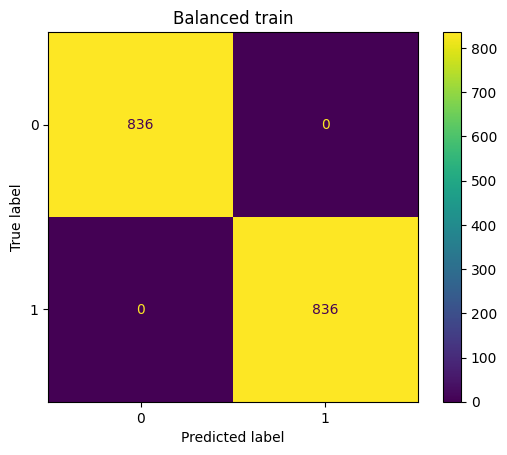

Balanced test Accuracy: 0.6168478260869565
Balanced test Precision: 0.612565445026178
Balanced test Recall: 0.6358695652173914
Balanced test Balanced Accuracy: 0.6168478260869565
Balanced test F1 Score: 0.6240000000000001


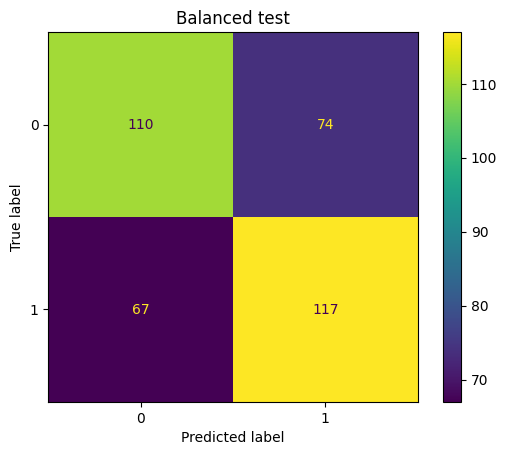

Imbalanced test Accuracy: 0.5973700688791485
Imbalanced test Precision: 0.16883116883116883
Imbalanced test Recall: 0.6358695652173914
Imbalanced test Balanced Accuracy: 0.6141131265577402
Imbalanced test F1 Score: 0.26681870011402514


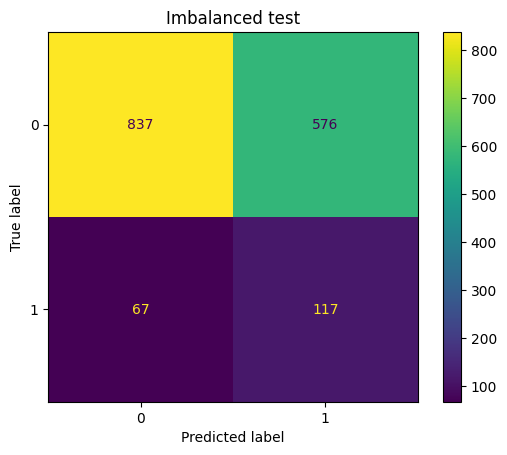

In [112]:

from sklearn.tree import DecisionTreeClassifier


# Create a Random Forest classifier
dt = DecisionTreeClassifier(criterion='gini', random_state=42)

# Create RFECV object with Random Forest as the estimator
dt_rfe = RFECV(estimator=dt, step=1, cv=5, scoring=make_scorer(f1_score))

# Fit RFECV
dt_rfe.fit(X_train_balanced, y_train_balanced)

# Transform the data
X_train_selected = dt_rfe.transform(X_train_balanced)
X_test_selected = dt_rfe.transform(X_test_imbalanced)
X_test_selected_balanced = dt_rfe.transform(X_test_balanced)

# Train a new classifier using only selected features
dt_final = DecisionTreeClassifier(random_state=42)
dt_final.fit(X_train_selected, y_train_balanced)


# Predict and calculate accuracy
y_pred = dt_final.predict(X_test_selected)
y_pred_balanced = dt_final.predict(X_test_selected_balanced)
y_pred_train = dt_final.predict(X_train_selected)

print("Selected Features:", dt_rfe.support_)
print("Feature Ranking:", dt_rfe.ranking_)


eval(y_train_balanced, y_pred_train, 'Balanced train')
eval(y_test_balanced, y_pred_balanced, 'Balanced test')
eval(y_test_imbalanced, y_pred, 'Imbalanced test')

In [114]:
RATIOS_SUBSET = [
 'SAL_TA',
 'L3',
 'ROE',
 'EAT_TA',
 'TL_TA',
 'CASH_TA',
 'ROS',
 'NCL_TA',
 'TL_SAL']


array([[ 1.77944786e+00,  2.12238182e-01,  1.70953328e+00, ...,
         5.88495494e-02,  2.57845700e-02,  1.50828126e-02],
       [ 1.57072178e+00,  4.19596857e-01,  1.83244760e+00, ...,
         7.31287798e-02,  2.63092463e-02,  1.43574345e-02],
       [ 7.36527104e-01,  2.74684669e-02,  4.78332264e+00, ...,
         1.01667013e-01,  2.64459873e-02,  5.52879021e-03],
       ...,
       [ 1.55683139e+00,  1.85636269e-01,  2.09700276e+00, ...,
        -2.28698880e-01, -6.93025596e-02, -3.30483874e-02],
       [ 3.13395804e+00,  2.50330030e-01,  2.27093758e+00, ...,
         9.02394925e-02,  4.92635624e-02,  2.16930500e-02],
       [ 2.53507220e+00,  1.35095776e-03,  7.07809885e+00, ...,
         8.25649128e-01,  3.10440550e-01,  4.38593126e-02]])

Balanced train Accuracy: 0.7446172248803827
Balanced train Precision: 0.8002936857562408
Balanced train Recall: 0.6519138755980861
Balanced train Balanced Accuracy: 0.7446172248803828
Balanced train F1 Score: 0.7185234014502307


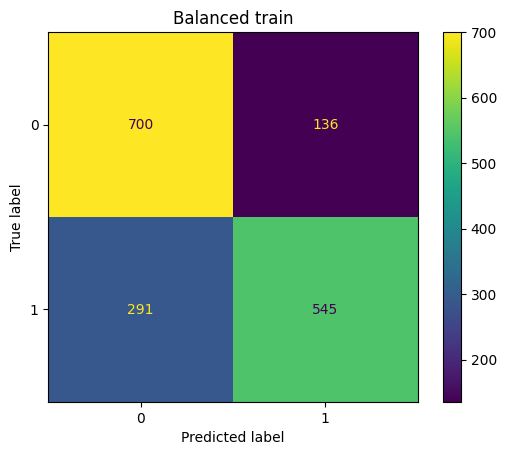

Balanced test Accuracy: 0.7255434782608695
Balanced test Precision: 0.7643312101910829
Balanced test Recall: 0.6521739130434783
Balanced test Balanced Accuracy: 0.7255434782608696
Balanced test F1 Score: 0.7038123167155426


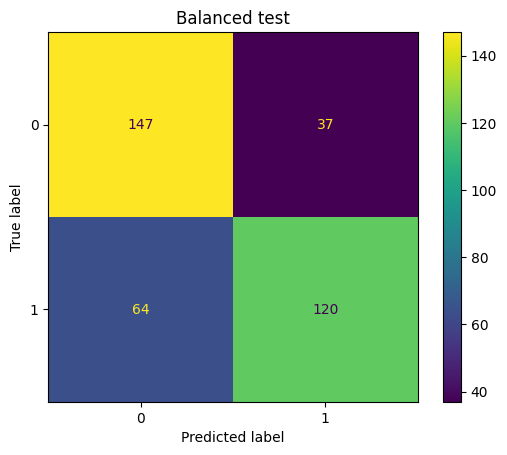

Imbalanced test Accuracy: 0.7714464621164684
Imbalanced test Precision: 0.2850356294536817
Imbalanced test Recall: 0.6521739130434783
Imbalanced test Balanced Accuracy: 0.7195759869534447
Imbalanced test F1 Score: 0.39669421487603307


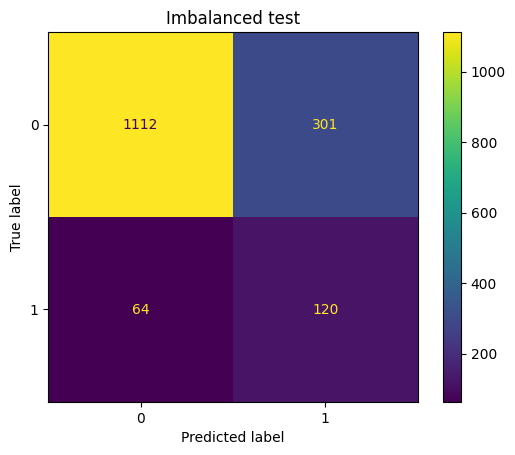

In [139]:

# Transform the data
X_train_selected = X_train_balanced[:, [col in RATIOS_SUBSET for col in RATIOS]]
X_test_selected = X_test_imbalanced[:, [col in RATIOS_SUBSET for col in RATIOS]]
X_test_selected_balanced =  X_test_balanced[:, [col in RATIOS_SUBSET for col in RATIOS]]

# Train a new classifier using only selected features
dt_final = DecisionTreeClassifier(criterion='gini', random_state=42, min_samples_split=40, min_samples_leaf=20, min_impurity_decrease=0.0001, max_depth=5)
dt_final.fit(X_train_selected, y_train_balanced)


# Predict and calculate accuracy
y_pred = dt_final.predict(X_test_selected)
y_pred_balanced = dt_final.predict(X_test_selected_balanced)
y_pred_train = dt_final.predict(X_train_selected)


eval(y_train_balanced, y_pred_train, 'Balanced train')
eval(y_test_balanced, y_pred_balanced, 'Balanced test')
eval(y_test_imbalanced, y_pred, 'Imbalanced test')

## XGBoost Classifier

Selected Features: [ True  True  True False False False False False  True  True False False
  True  True False  True False False False  True  True  True  True False
 False  True False  True]
Feature Ranking: [ 1  1  1 12  3  5 10  9  1  1 13  7  1  1  2  1  8  6  4  1  1  1  1 11
 14  1 15  1]
Balanced train Accuracy: 1.0
Balanced train Precision: 1.0
Balanced train Recall: 1.0
Balanced train Balanced Accuracy: 1.0
Balanced train F1 Score: 1.0


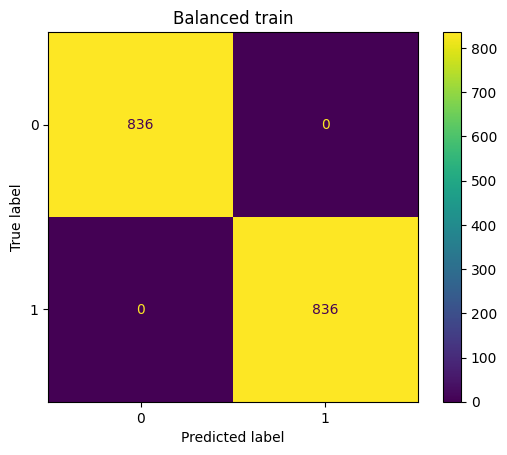

Balanced test Accuracy: 0.7038043478260869
Balanced test Precision: 0.7005347593582888
Balanced test Recall: 0.7119565217391305
Balanced test Balanced Accuracy: 0.7038043478260869
Balanced test F1 Score: 0.706199460916442


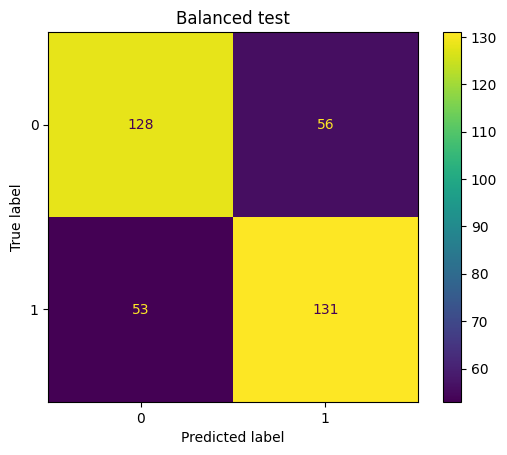

Imbalanced test Accuracy: 0.6887914840325611
Imbalanced test Precision: 0.22782608695652173
Imbalanced test Recall: 0.7119565217391305
Imbalanced test Balanced Accuracy: 0.6988657343302871
Imbalanced test F1 Score: 0.3451910408432148


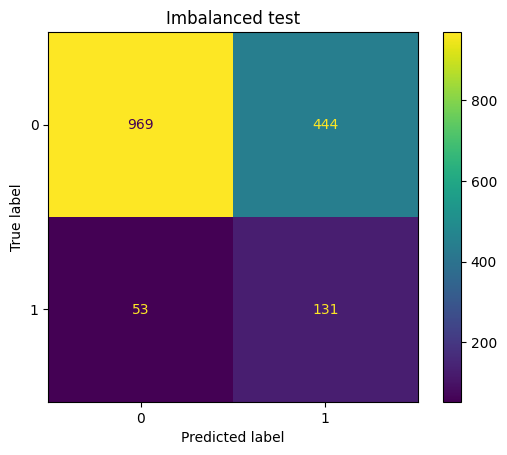

In [68]:

from xgboost import XGBClassifier


# Create a Random Forest classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)


# Create RFECV object with Random Forest as the estimator
xgb_rfe = RFECV(estimator=xgb, step=1, cv=5, scoring=make_scorer(f1_score))

# Fit RFECV
xgb_rfe.fit(X_train_balanced, y_train_balanced)

# Transform the data
X_train_selected = xgb_rfe.transform(X_train_balanced)
X_test_selected = xgb_rfe.transform(X_test_imbalanced)
X_test_selected_balanced = xgb_rfe.transform(X_test_balanced)

# Train a new classifier using only selected features
xgb_final =XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_final.fit(X_train_selected, y_train_balanced)


# Predict and calculate accuracy
y_pred = xgb_final.predict(X_test_selected)
y_pred_balanced = xgb_final.predict(X_test_selected_balanced)
y_pred_train = xgb_final.predict(X_train_selected)

print("Selected Features:", xgb_rfe.support_)
print("Feature Ranking:", xgb_rfe.ranking_)


eval(y_train_balanced, y_pred_train, 'Balanced train')
eval(y_test_balanced, y_pred_balanced, 'Balanced test')
eval(y_test_imbalanced, y_pred, 'Imbalanced test')

In [ ]:

# from sklearn.svm import SVC

# # Create an SVM classifier
# svm = SVC(kernel='linear', random_state=42)


# # Create RFECV object with Random Forest as the estimator
# svm_rfe = RFECV(estimator=svm, step=1, cv=5, scoring=make_scorer(f1_score))

# # Fit RFECV
# svm_rfe.fit(X_train_balanced, y_train_balanced)


# # Transform the data
# X_train_selected = svm_rfe.transform(X_train_balanced)
# X_test_selected = svm_rfe.transform(X_test_imbalanced)
# X_test_selected_balanced = svm_rfe.transform(X_test_balanced)

# # Train a new classifier using only selected features
# svm_final = SVC(kernel='linear', random_state=42)
# svm_final.fit(X_train_selected, y_train_balanced)


# # Predict and calculate accuracy
# y_pred = svm_final.predict(X_test_selected)
# y_pred_balanced = svm_final.predict(X_test_selected_balanced)
# y_pred_train = svm_final.predict(X_train_selected)

# print("Selected Features:", svm_rfe.support_)
# print("Feature Ranking:", svm_rfe.ranking_)


# eval(y_train_balanced, y_pred_train, 'Balanced train')
# eval(y_test_balanced, y_pred_balanced, 'Balanced test')
# eval(y_test_imbalanced, y_pred, 'Imbalanced test')

In [ ]:

# from sklearn.svm import SVC


# # Create an SVM classifier
# svm_rbf = SVC(kernel='rbf', random_state=42)


# # Create RFECV object with Random Forest as the estimator
# svm_rbf_rfe = RFECV(estimator=svm_rbf, step=1, cv=5, scoring=make_scorer(f1_score))

# # Fit RFECV
# svm_rbf_rfe.fit(X_train_balanced, y_train_balanced)


# # Transform the data
# X_train_selected = svm_rbf_rfe.transform(X_train_balanced)
# X_test_selected = svm_rbf_rfe.transform(X_test_imbalanced)
# X_test_selected_balanced = svm_rbf_rfe.transform(X_test_balanced)

# # Train a new classifier using only selected features
# svm_rbf_final = SVC(kernel='rbf', random_state=42)
# svm_rbf_final.fit(X_train_selected, y_train_balanced)


# # Predict and calculate accuracy
# y_pred = svm_rbf_final.predict(X_test_selected)
# y_pred_balanced = svm_rbf_final.predict(X_test_selected_balanced)
# y_pred_train = svm_rbf_final.predict(X_train_selected)

# print("Selected Features:", svm_rbf_rfe.support_)
# print("Feature Ranking:", svm_rbf_rfe.ranking_)


# eval(y_train_balanced, y_pred_train, 'Balanced train')
# eval(y_test_balanced, y_pred_balanced, 'Balanced test')
# eval(y_test_imbalanced, y_pred, 'Imbalanced test')

In [90]:
len(RATIOS)

28

Balanced train Accuracy: 0.6901913875598086
Balanced train Precision: 0.6790540540540541
Balanced train Recall: 0.7212918660287081
Balanced train Balanced Accuracy: 0.6901913875598086
Balanced train F1 Score: 0.6995359628770301


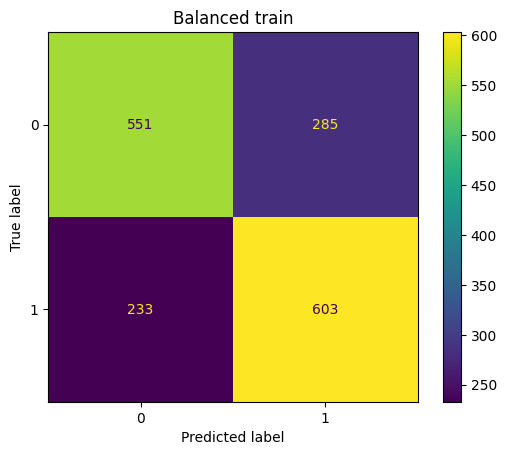

Balanced test Accuracy: 0.7282608695652174
Balanced test Precision: 0.7142857142857143
Balanced test Recall: 0.7608695652173914
Balanced test Balanced Accuracy: 0.7282608695652174
Balanced test F1 Score: 0.7368421052631581


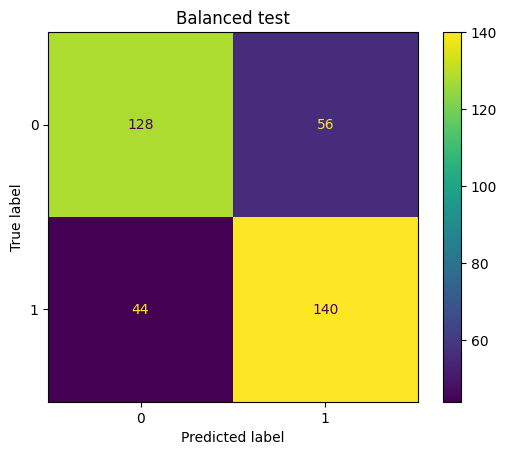

Imbalanced test Accuracy: 0.6493425172197871
Imbalanced test Precision: 0.21341463414634146
Imbalanced test Recall: 0.7608695652173914
Imbalanced test Balanced Accuracy: 0.697844549063048
Imbalanced test F1 Score: 0.3333333333333333


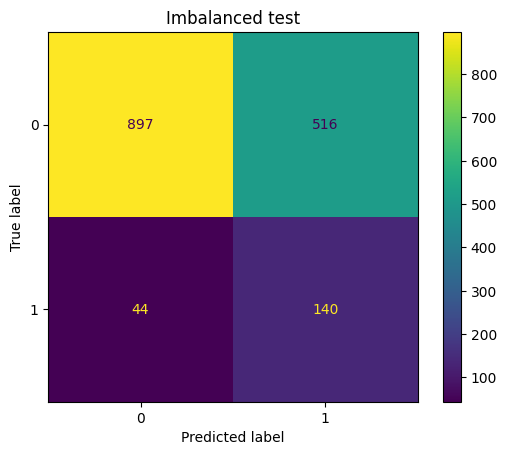

In [111]:

from sklearn.neural_network import MLPClassifier

from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split



# Create an MLP classifier with early stopping and a validation fraction
mlp = MLPClassifier(hidden_layer_sizes=(56, 28, 14, 7), max_iter=10000, alpha=1e-6,
                    solver='adam', verbose=0,
                    validation_fraction=0.3,  # 10% of training data used as validation set
                    early_stopping=True,      # Enable early stopping
                    n_iter_no_change=30)      # Number of iterations with no improvement to stop training



mlp.fit(X_train_balanced, y_train_balanced)

# # Predict and calculate accuracy
y_pred = mlp.predict(X_test_imbalanced)
y_pred_balanced = mlp.predict(X_test_balanced)
y_pred_train = mlp.predict(X_train_balanced)

# print("Selected Features:", mlp_rfe.support_)
# print("Feature Ranking:", mlp_rfe.ranking_)


eval(y_train_balanced, y_pred_train, 'Balanced train')
eval(y_test_balanced, y_pred_balanced, 'Balanced test')
eval(y_test_imbalanced, y_pred, 'Imbalanced test')

In [ ]:
# dim ='sknace_division'

# summary_table = (
#     pd.concat(
#         [
#             data.query('RU_event_3y_off == 0').groupby([dim])['financial_statement_id'].nunique().to_frame('I0'),
#             data.query('RU_event_3y_off == 1').groupby([dim])['financial_statement_id'].nunique().to_frame('I1'),

#             data.query('RUZ_cancelled_3y_off == 0').groupby([dim])['financial_statement_id'].nunique().to_frame('C0'),
#             data.query('RUZ_cancelled_3y_off == 1').groupby([dim])['financial_statement_id'].nunique().to_frame('C1'),

#             data.query('RUZ_indirect_criteria_3y_off == 0').groupby([dim])['financial_statement_id'].nunique().to_frame('L0'),
#             data.query('RUZ_indirect_criteria_3y_off == 1').groupby([dim])['financial_statement_id'].nunique().to_frame('L1'),

#             data.query('combined_issue_criteria_3y_off == 0').groupby([dim])['financial_statement_id'].nunique().to_frame('FD1'),
#             data.query('combined_issue_criteria_3y_off == 1').groupby([dim])['financial_statement_id'].nunique().to_frame('FD1'),
#             data.groupby([dim])['financial_statement_id'].nunique().to_frame('Spolu'),
#         ], axis = 1
#     ).reset_index()
# )
# display(summary_table)
# for col in summary_table.columns[2:]:
#     # summary_table[col] = summary_table[col].fillna(0)
#     summary_table[col] = pd.to_numeric(summary_table[col]).fillna(0).apply(lambda x: int(x))

# summary_table['Podiel I1'] = summary_table['I1'] / summary_table['Spolu']
# summary_table['Podiel C1'] = summary_table['C1'] / summary_table['Spolu']
# summary_table['Podiel L1'] = summary_table['L1'] / summary_table['Spolu']
# summary_table['Podiel FD1'] = summary_table['FD1'] / summary_table['Spolu']

# summary_table[['sknace_division', 'Podiel I1', 'Podiel C1', 'Podiel L1', 'Podiel FD1', 'Spolu']]

,sknace_division,I0,I1,C0,C1,L0,L1,FD1,FD1,Spolu
0,A,248,10.0,250,8,252,6,236,22,258
1,C,1752,50.0,1749,53,1696,106,1626,176,1802
2,F,760,35.0,765,30,743,52,695,100,795
3,G,2767,46.0,2660,153,2636,177,2464,349,2813
4,H,597,12.0,589,20,553,56,530,79,609
5,I,109,5.0,107,7,96,18,87,27,114
6,J,284,3.0,270,17,276,11,259,28,287
7,L,277,6.0,261,22,259,24,235,48,283
8,M,577,17.0,546,48,536,58,482,112,594
9,N,385,12.0,369,28,368,29,334,63,397


TypeError: arg must be a list, tuple, 1-d array, or Series